# 🧠 PISA 2022 UK Student Data – Exploratory Data Analysis (EDA)

## 📌 Objective
This notebook explores student performance in math using the 2022 UK PISA dataset, focusing on individual, family, academic, school, and social context variables. The main target variable is **math performance** (`PV1MATH`), and we create a binary label for **low math performers**.

## 🔍 Key Questions
- What is the distribution of math performance scores?
- How does performance vary by gender, region, and socioeconomic status (ESCS)?
- Which variables are most correlated with math outcomes?
- Are there identifiable risk factors for low math performance?

## 🗂️ Structure
1. **Data Import and Variable Definitions**
2. **Initial Data Overview and Missingness**
3. **Distribution and Group Comparisons**
4. **Correlation and Predictor Analysis**
5. **Binary Classification Target (`low_math_perf`)**
6. **Proportional Analysis by Key Groups**
7. *(Optional)* Final Summary + Preparation for Modeling

## 🛠️ Notes
- The analysis is fully reproducible.
- No transformations or imputations are applied yet.
- Next steps may include feature engineering, modeling, or dashboarding.

## Imports and Load Data

In [1]:
#imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#load data
df = pd.read_csv("/workspaces/mini_project_2/data/pisa_2022_uk_selected.csv")

## Define Variable Types 

In [3]:
#variable types 
# Achievement (target and optional outputs)
achievement_vars = ['PV1MATH', 'PV1READ', 'PV1SCIE']

# Individual
individual_vars = [
    'ST004D01T', 'ST016Q01NA', 'ST313Q01JA', 'ST309Q02JA',
    'ST301Q01JA', 'ST305Q01JA'
]

# Academic
academic_vars = [
    'ST296Q01JA', 'ST293Q03JA', 'ST292Q01JA', 'ST327Q06JA', 'ST355Q05JA'
]

# Family
family_vars = [
    'ESCS', 'ST230Q01JA', 'ST258Q01JA', 'ST259Q01JA', 'ST300Q01JA',
    'ST300Q02JA', 'ST250Q02JA', 'ST255Q01JA'
]

# School
school_vars = [
    'ST034Q03TA', 'ST267Q01JA', 'ST267Q05JA', 'ST273Q01JA', 'ST285Q04JA',
    'ST270Q02JA', 'ST038Q05NA', 'ST265Q03JA', 'ST272Q01JA'
]

# Peer/Social
peer_vars = [
    'ST034Q02TA', 'ST038Q03NA', 'ST038Q04NA', 'ST315Q04JA', 'ST315Q06JA'
]

# Context
context_vars = ['REGION']

# All selected variables
selected_vars = achievement_vars + individual_vars + academic_vars + \
                family_vars + school_vars + peer_vars + context_vars


## Basic Overview

In [4]:
#basic overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12972 entries, 0 to 12971
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PV1MATH     12972 non-null  float64
 1   PV2MATH     12972 non-null  float64
 2   PV3MATH     12972 non-null  float64
 3   PV4MATH     12972 non-null  float64
 4   PV5MATH     12972 non-null  float64
 5   PV6MATH     12972 non-null  float64
 6   PV7MATH     12972 non-null  float64
 7   PV8MATH     12972 non-null  float64
 8   PV9MATH     12972 non-null  float64
 9   PV10MATH    12972 non-null  float64
 10  PV1READ     12972 non-null  float64
 11  PV2READ     12972 non-null  float64
 12  PV3READ     12972 non-null  float64
 13  PV4READ     12972 non-null  float64
 14  PV5READ     12972 non-null  float64
 15  PV6READ     12972 non-null  float64
 16  PV7READ     12972 non-null  float64
 17  PV8READ     12972 non-null  float64
 18  PV9READ     12972 non-null  float64
 19  PV10READ    12972 non-nul

## Missing Values 

In [5]:
df.isnull().sum().sort_values(ascending=False)

ST355Q05JA    8268
ST300Q01JA    8035
ST300Q02JA    8024
ST305Q01JA    7637
ST309Q02JA    7559
              ... 
PV5MATH          0
PV2MATH          0
PV3MATH          0
PV1MATH          0
REGION           0
Length: 64, dtype: int64

## Target Variable Exploration 

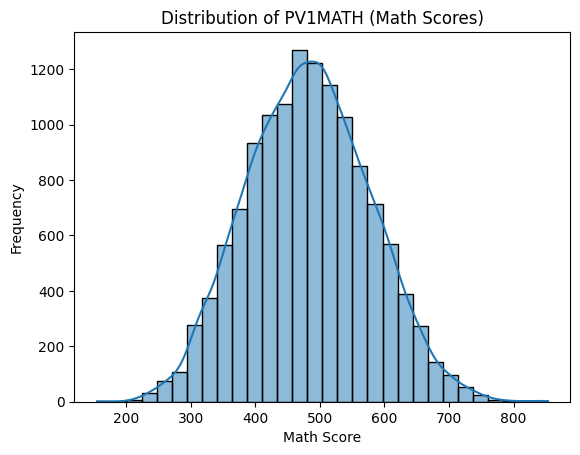

In [6]:
#Explore target variable (PV1MATH)
sns.histplot(df['PV1MATH'], kde=True, bins=30)
plt.title('Distribution of PV1MATH (Math Scores)')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['PV1MATH'].describe()

count    12972.000000
mean       482.542736
std         95.087835
min        154.859000
25%        414.913500
50%        481.350000
75%        547.694750
max        853.173000
Name: PV1MATH, dtype: float64

In [8]:
df['PV1MATH'].isnull().sum()

np.int64(0)

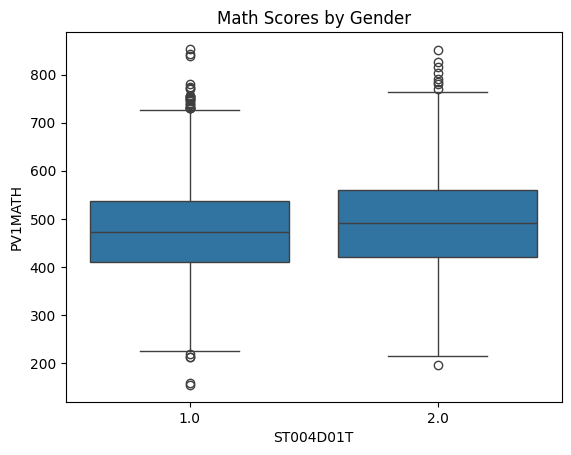

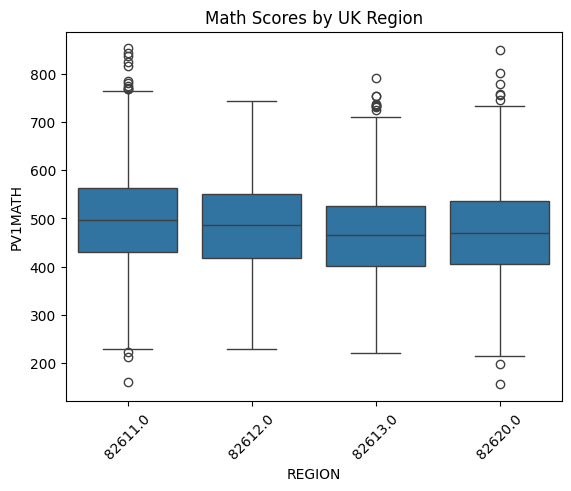

In [9]:
## Boxplots by Maths and Gender 

# Maths*Gender
sns.boxplot(x='ST004D01T', y='PV1MATH', data=df)
plt.title('Math Scores by Gender')
plt.show()

# Maths*Region 
sns.boxplot(x='REGION', y='PV1MATH', data=df)
plt.title('Math Scores by UK Region')
plt.xticks(rotation=45)
plt.show()

## Insights from boxplots 

#There is a modest difference in maths scores by gender, with males slightly outperforming on average. 
#There are regional differences in maths scores, but they are not extreme 

## Distributions of key predictors 

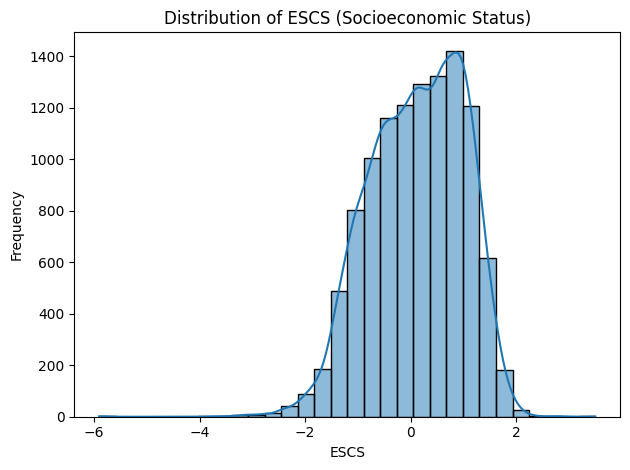

In [10]:
# Histogram of ESCS
sns.histplot(df['ESCS'], bins=30, kde=True)
plt.title('Distribution of ESCS (Socioeconomic Status)')
plt.xlabel('ESCS')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

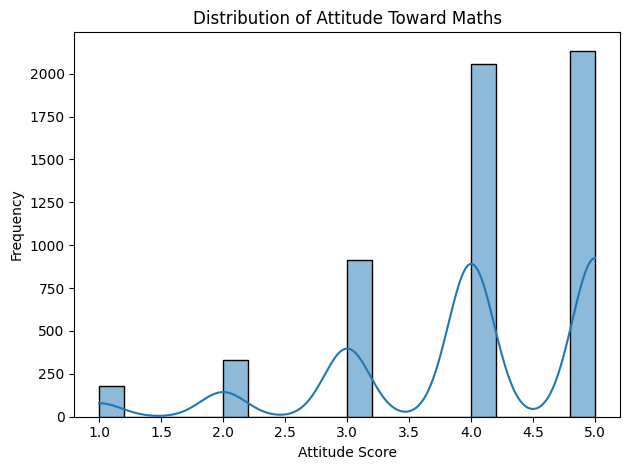

In [11]:
# Histogram or KDE for attitude toward maths (example: ST293Q03JA)
sns.histplot(df['ST293Q03JA'], bins=20, kde=True)
plt.title('Distribution of Attitude Toward Maths')
plt.xlabel('Attitude Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

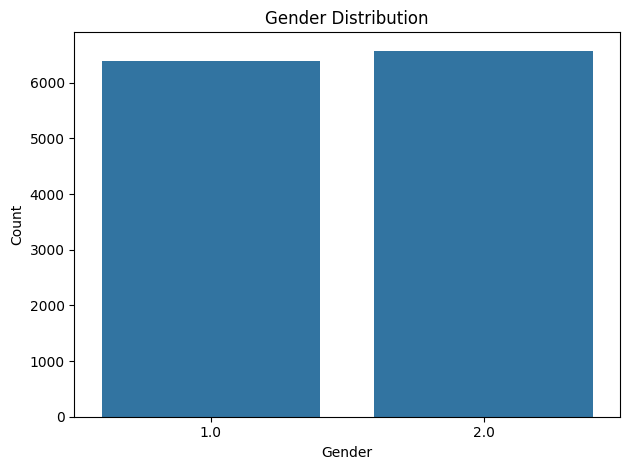

In [12]:
# Bar plot for Gender
sns.countplot(x='ST004D01T', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Correlation matrices 

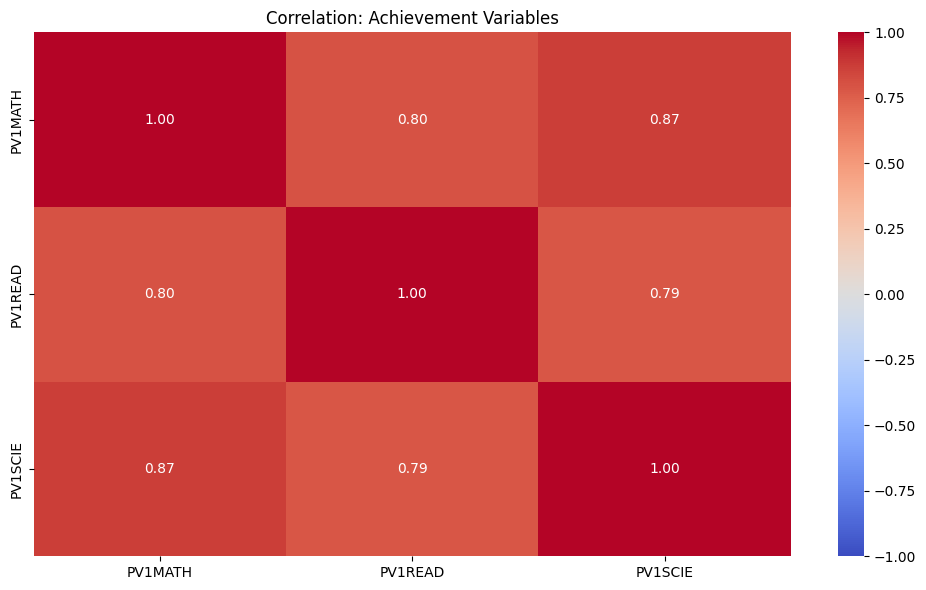

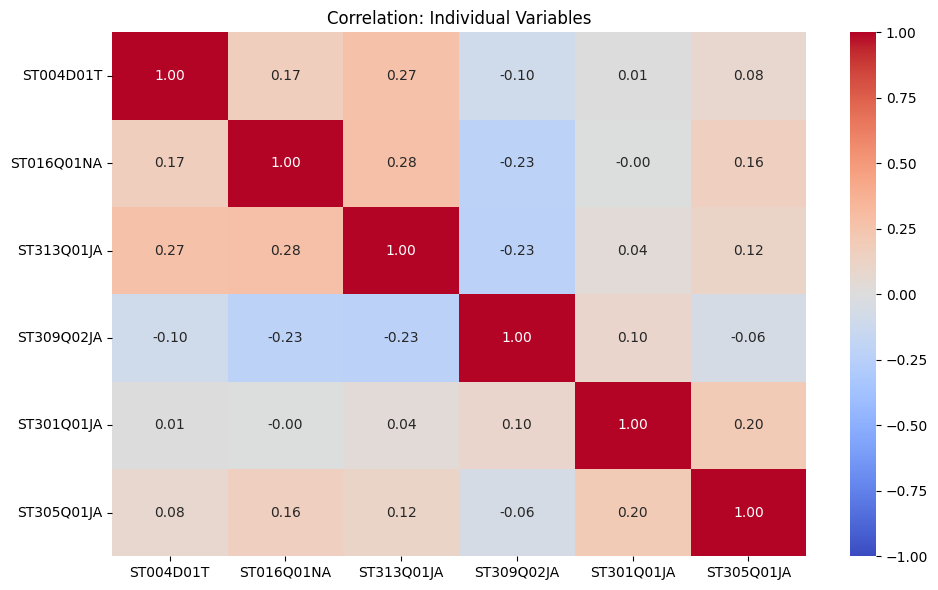

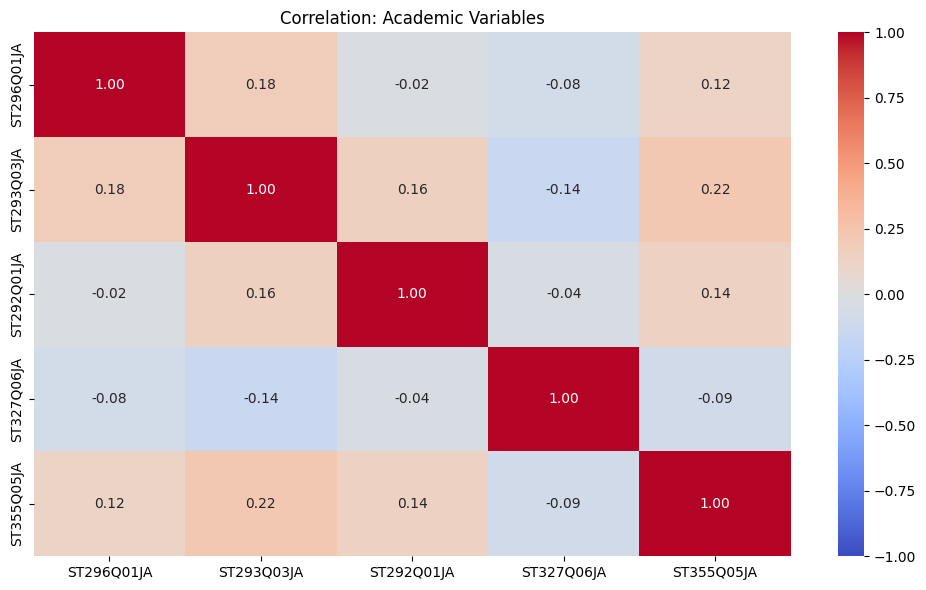

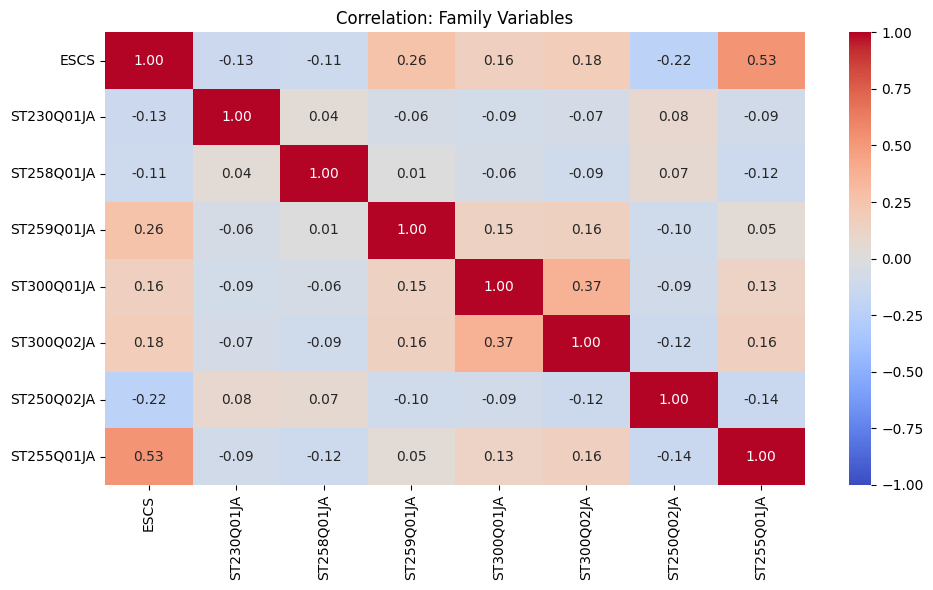

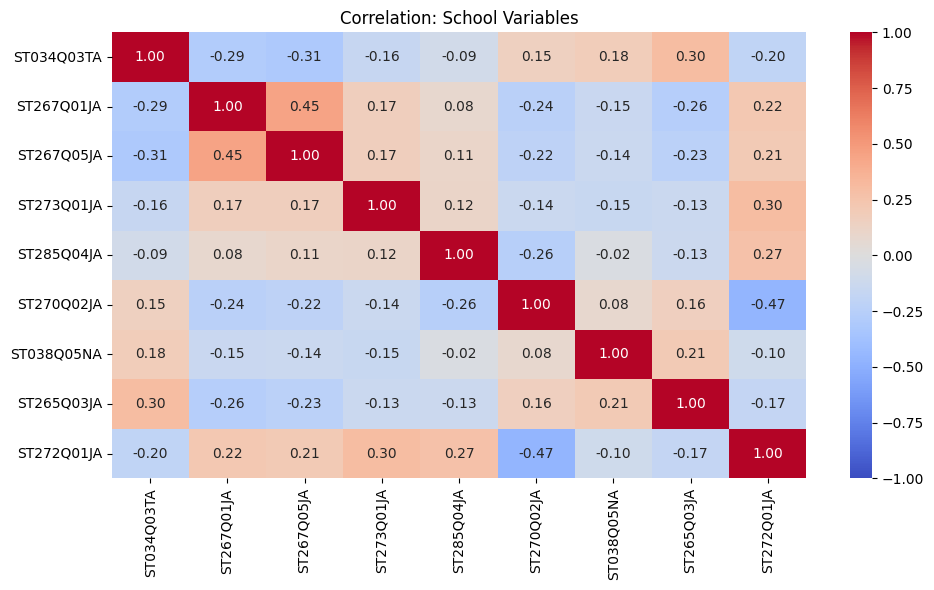

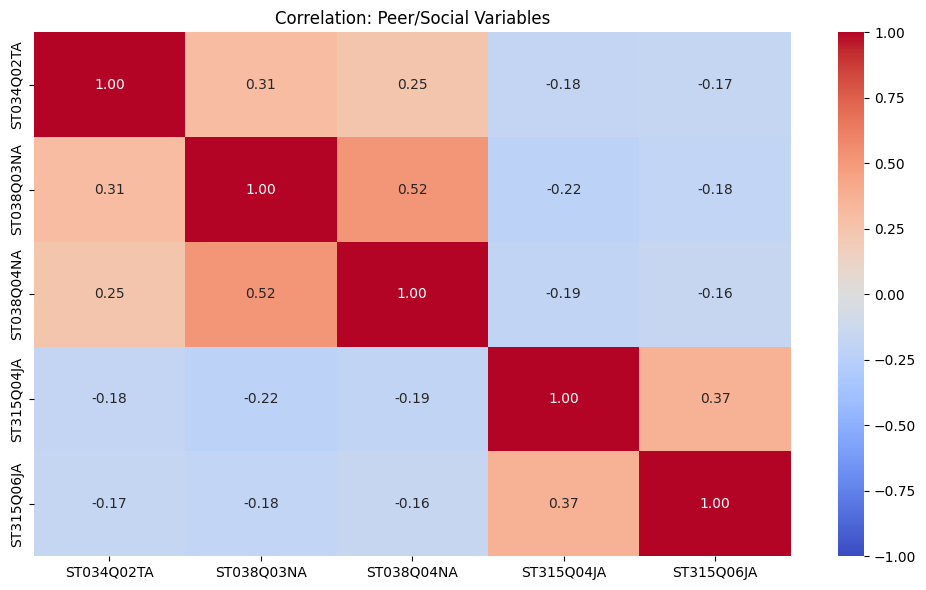

In [13]:
#correlation with different variable levels 

# Helper function to plot heatmap
def plot_corr_heatmap(df, var_list, title):
    data = df[var_list].copy()
    # Drop columns with all NaNs or only one unique value
    data = data.select_dtypes(include='number').dropna(axis=1, how='all')
    data = data.loc[:, data.nunique(dropna=True) > 1]
    
    corr = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot each correlation matrix
plot_corr_heatmap(df, achievement_vars, 'Correlation: Achievement Variables')
plot_corr_heatmap(df, individual_vars, 'Correlation: Individual Variables')
plot_corr_heatmap(df, academic_vars, 'Correlation: Academic Variables')
plot_corr_heatmap(df, family_vars, 'Correlation: Family Variables')
plot_corr_heatmap(df, school_vars, 'Correlation: School Variables')
plot_corr_heatmap(df, peer_vars, 'Correlation: Peer/Social Variables')

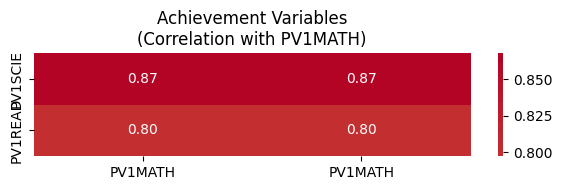

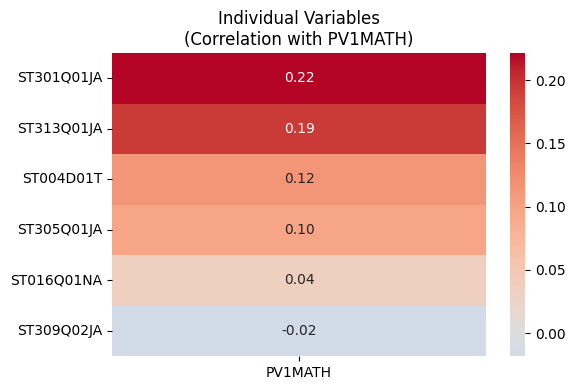

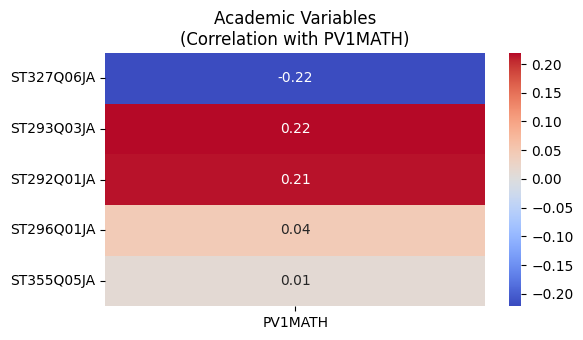

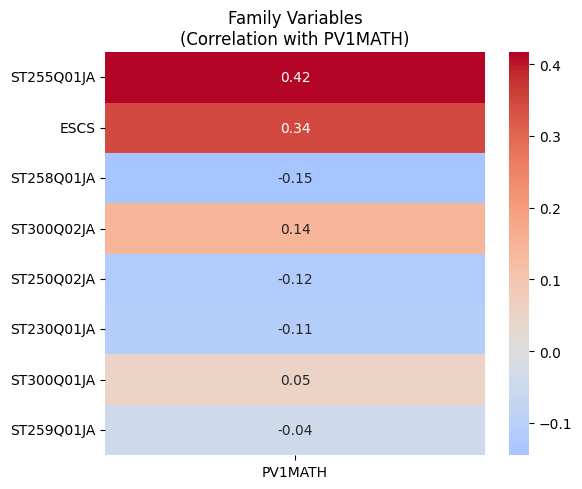

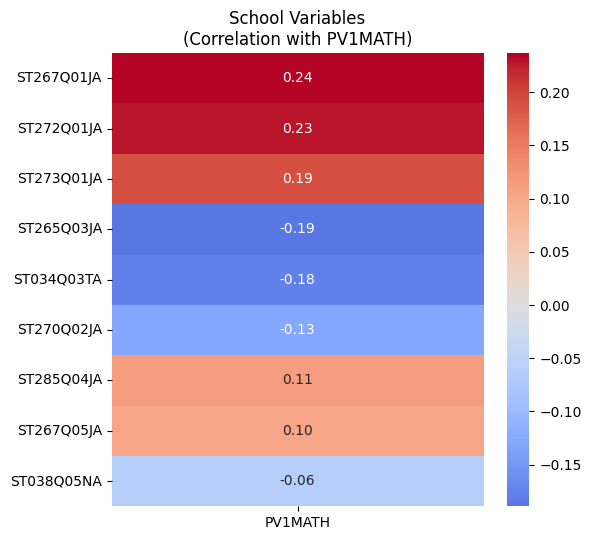

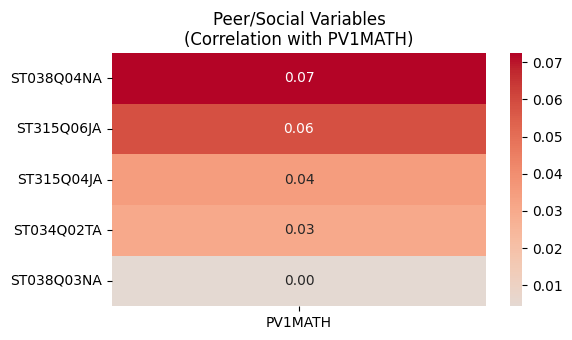

In [14]:
##Corrleation with maths 
def plot_corr_with_target(df, var_list, target, title):
    data = df[var_list + [target]].copy()
    data = data.select_dtypes(include='number').dropna(axis=0, how='any')
    data = data.loc[:, data.nunique(dropna=True) > 1]

    corr = data.corr()[[target]].drop(index=target)
    corr = corr.reindex(corr.iloc[:, 0].abs().sort_values(ascending=False).index)

    plt.figure(figsize=(6, len(corr) * 0.5 + 1))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title(f'{title}\n(Correlation with {target})')
    plt.tight_layout()
    plt.show()

plot_corr_with_target(df, achievement_vars, 'PV1MATH', 'Achievement Variables')
plot_corr_with_target(df, individual_vars, 'PV1MATH', 'Individual Variables')
plot_corr_with_target(df, academic_vars, 'PV1MATH', 'Academic Variables')
plot_corr_with_target(df, family_vars, 'PV1MATH', 'Family Variables')
plot_corr_with_target(df, school_vars, 'PV1MATH', 'School Variables')
plot_corr_with_target(df, peer_vars, 'PV1MATH', 'Peer/Social Variables')

## Binary for Low Maths

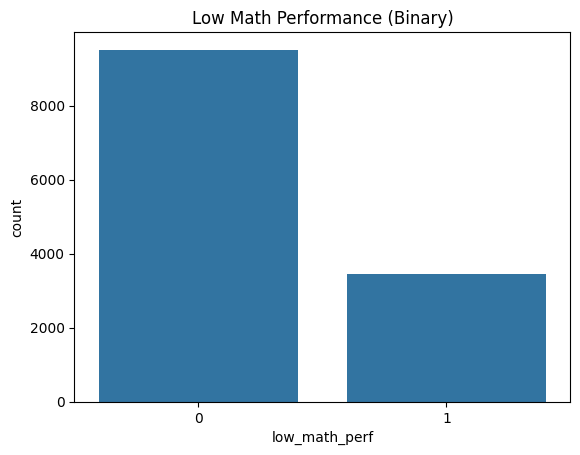

In [15]:
#Binary Variables for Low Maths 
df['low_math_perf'] = (df['PV1MATH'] < 420.07).astype(int)
sns.countplot(x='low_math_perf', data=df)
plt.title('Low Math Performance (Binary)')
plt.show()

## Low Maths Peformance by Features

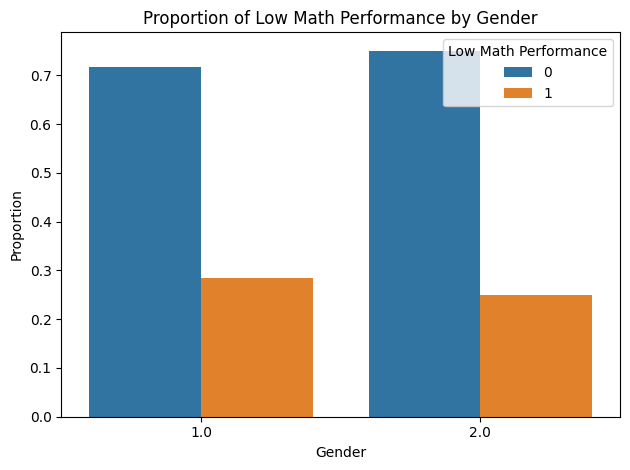

In [16]:
# Proportion of low math performers by gender
gender_props = df.groupby('ST004D01T')['low_math_perf'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x='ST004D01T', y='proportion', hue='low_math_perf', data=gender_props)
plt.title('Proportion of Low Math Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Low Math Performance')
plt.tight_layout()
plt.show()

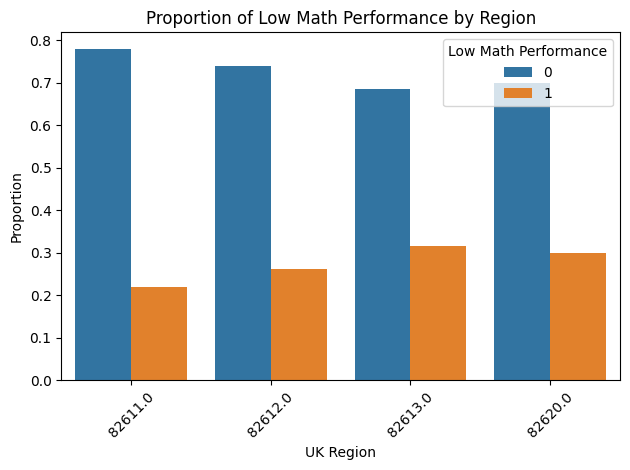

In [17]:
# Proportion by REGION
region_props = df.groupby('REGION')['low_math_perf'].value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x='REGION', y='proportion', hue='low_math_perf', data=region_props)
plt.title('Proportion of Low Math Performance by Region')
plt.xlabel('UK Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Low Math Performance')
plt.tight_layout()
plt.show()

/tmp/ipykernel_37961/613231792.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  escs_props = df.groupby('ESCS_group')['low_math_perf'].value_counts(normalize=True).rename('proportion').reset_index()


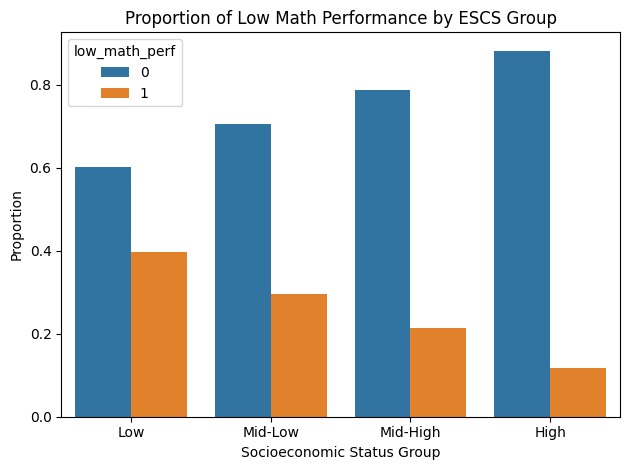

In [21]:
# Proportion by ESCS group
df['ESCS_group'] = pd.qcut(df['ESCS'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Proportion by ESCS group
escs_props = df.groupby('ESCS_group')['low_math_perf'].value_counts(normalize=True).rename('proportion').reset_index()

sns.barplot(x='ESCS_group', y='proportion', hue='low_math_perf', data=escs_props)
plt.title('Proportion of Low Math Performance by ESCS Group')
plt.xlabel('Socioeconomic Status Group')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

## 🔍 Summary of EDA Insights

- **Math Score Distribution**: Slightly left-skewed; wide range.
- **Gender Differences**: Boys slightly outperform girls on average.
- **Regional Variation**: Some regional differences in performance, though not extreme.
- **Socioeconomic Disparity**: Students from lower ESCS quartiles are more likely to perform poorly in math.
- **Key Predictors**: Academic and family background variables show stronger correlations with math performance than peer or school-level variables.